In [74]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [75]:
#Load the Healthy Life Years Data
df = pd.read_csv('./data/tps00150.tsv',sep='\t', header=None).transpose()
#Set the First Row as headers
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)

df.head()

,"unit,indic_he,geo\time","YR,F_0_DFLE,AT","YR,F_0_DFLE,BE","YR,F_0_DFLE,BG","YR,F_0_DFLE,CH","YR,F_0_DFLE,CY","YR,F_0_DFLE,CZ","YR,F_0_DFLE,DE","YR,F_0_DFLE,DK","YR,F_0_DFLE,EE",...,"YR,M_0_LE,RS","YR,M_0_LE,RU","YR,M_0_LE,SE","YR,M_0_LE,SI","YR,M_0_LE,SK","YR,M_0_LE,SM","YR,M_0_LE,TR","YR,M_0_LE,UA","YR,M_0_LE,UK","YR,M_0_LE,XK"
0,2005,60.1,62.3 bd,:,:,58.2 d,60 d,54.8,68.4,52.4,...,70.2,:,78.5,73.9,70.2,:,:,:,77.0,:
1,2006,61,63.2,71.9 d,:,63.4 bd,59.9,58.3 bd,67.2,53.9,...,70.8,60.4,78.8,74.5,70.4,:,:,62.3,77.3,:
2,2007,61.4,63.9,73.9,63.6,62.8,63.3 b,58.6,67.4,54.9,...,70.9,61.4,79.0,74.6,70.6,:,:,61.8,77.6,:
3,2008,59.9 b,64.1,65.7 b,64.6,64.5,63.4,57.7 b,60.8 b,57.5 b,...,71.3,61.8,79.2,75.5 b,70.9,:,:,62.3,77.7,:
4,2009,60.8,63.7,65.9,63.0,65.3,62.7,58.1,60.4,59.2,...,71.4,62.8,79.4,75.9,71.4,:,73.3,:,78.3,:


In [76]:
headers[85:118]

85       YR,M_0_DFLE,AT
86       YR,M_0_DFLE,BE
87       YR,M_0_DFLE,BG
88       YR,M_0_DFLE,CH
89       YR,M_0_DFLE,CY
90       YR,M_0_DFLE,CZ
91       YR,M_0_DFLE,DE
92       YR,M_0_DFLE,DK
93       YR,M_0_DFLE,EE
94       YR,M_0_DFLE,EL
95       YR,M_0_DFLE,ES
96     YR,M_0_DFLE,EU27
97     YR,M_0_DFLE,EU28
98       YR,M_0_DFLE,FI
99       YR,M_0_DFLE,FR
100      YR,M_0_DFLE,HR
101      YR,M_0_DFLE,HU
102      YR,M_0_DFLE,IE
103      YR,M_0_DFLE,IS
104      YR,M_0_DFLE,IT
105      YR,M_0_DFLE,LT
106      YR,M_0_DFLE,LU
107      YR,M_0_DFLE,LV
108      YR,M_0_DFLE,MT
109      YR,M_0_DFLE,NL
110      YR,M_0_DFLE,NO
111      YR,M_0_DFLE,PL
112      YR,M_0_DFLE,PT
113      YR,M_0_DFLE,RO
114      YR,M_0_DFLE,SE
115      YR,M_0_DFLE,SI
116      YR,M_0_DFLE,SK
117      YR,M_0_DFLE,UK
Name: 0, dtype: object

In [77]:
malta_columns = [0,24,108]
maltese_data = df.iloc[:,malta_columns]
maltese_data.columns = ['Year','Females','Males']
maltese_data

,Year,Females,Males
0,2005,70.4 d,68.6 d
1,2006,69.5,68.3
2,2007,71.1,69.2
3,2008,72.1,68.8
4,2009,71.0,69.4
5,2010,71.3,70.1
6,2011,70.7,69.9
7,2012,72.2,71.5
8,2013,72.7,71.6
9,2014,74.3,72.3


In [78]:
#Remove b's from data
maltese_data.set_value(0,'Females',70.4) 
maltese_data.set_value(0,'Males',68.6)

/home/marc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/marc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Females,Males
0,2005,70.4,68.6
1,2006,69.5,68.3
2,2007,71.1,69.2
3,2008,72.1,68.8
4,2009,71.0,69.4
5,2010,71.3,70.1
6,2011,70.7,69.9
7,2012,72.2,71.5
8,2013,72.7,71.6
9,2014,74.3,72.3


In [79]:
#change values to numeric
maltese_data = maltese_data.apply(pd.to_numeric)
maltese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
Year       12 non-null int64
Females    12 non-null float64
Males      12 non-null float64
dtypes: float64(2), int64(1)
memory usage: 368.0 bytes


In [80]:
#Compute Average
maltese_data['Average'] = (maltese_data['Females']+maltese_data['Males'])/2

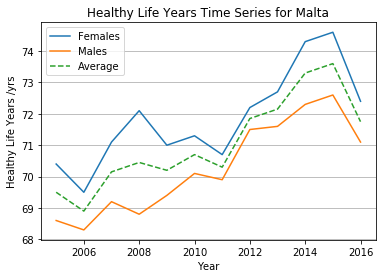

In [82]:
fig = plt.figure()
plt.plot(maltese_data['Year'],maltese_data['Females'])
plt.plot(maltese_data['Year'],maltese_data['Males'])
plt.plot(maltese_data['Year'],maltese_data['Average'], '--')
plt.xlabel('Year')
plt.ylabel('Healthy Life Years /yrs')
plt.title('Healthy Life Years Time Series for Malta')
plt.legend()
plt.grid(1,which='major',axis='y')
fig.savefig('./plots/hly_time_series.png',dpi=300)

In [83]:
#Get 2016 Data of females
data_2016 = df.iloc[:,1:34].iloc[11,:]
data_2016

0
YR,F_0_DFLE,AT       57.1 
YR,F_0_DFLE,BE       63.8 
YR,F_0_DFLE,BG      67.5 b
YR,F_0_DFLE,CH       57.7 
YR,F_0_DFLE,CY       68.8 
YR,F_0_DFLE,CZ       64.0 
YR,F_0_DFLE,DE       67.3 
YR,F_0_DFLE,DK       60.3 
YR,F_0_DFLE,EE       59.0 
YR,F_0_DFLE,EL       64.7 
YR,F_0_DFLE,ES       66.5 
YR,F_0_DFLE,EU27        : 
YR,F_0_DFLE,EU28     64.2 
YR,F_0_DFLE,FI       57.0 
YR,F_0_DFLE,FR       64.1 
YR,F_0_DFLE,HR       58.7 
YR,F_0_DFLE,HU       60.2 
YR,F_0_DFLE,IE       69.8 
YR,F_0_DFLE,IS          : 
YR,F_0_DFLE,IT      67.2 b
YR,F_0_DFLE,LT       59.4 
YR,F_0_DFLE,LU      58.9 b
YR,F_0_DFLE,LV       54.9 
YR,F_0_DFLE,MT       72.4 
YR,F_0_DFLE,NL      57.8 b
YR,F_0_DFLE,NO       67.8 
YR,F_0_DFLE,PL       64.6 
YR,F_0_DFLE,PT       57.4 
YR,F_0_DFLE,RO       59.0 
YR,F_0_DFLE,SE       73.3 
YR,F_0_DFLE,SI       57.9 
YR,F_0_DFLE,SK       57.0 
YR,F_0_DFLE,UK       63.1 
Name: 11, dtype: object

In [84]:
data_2016[2]=67.5
data_2016[19]=67.2
data_2016[21]=58.9
data_2016[24]=57.8
data_2016

0
YR,F_0_DFLE,AT      57.1 
YR,F_0_DFLE,BE      63.8 
YR,F_0_DFLE,BG       67.5
YR,F_0_DFLE,CH      57.7 
YR,F_0_DFLE,CY      68.8 
YR,F_0_DFLE,CZ      64.0 
YR,F_0_DFLE,DE      67.3 
YR,F_0_DFLE,DK      60.3 
YR,F_0_DFLE,EE      59.0 
YR,F_0_DFLE,EL      64.7 
YR,F_0_DFLE,ES      66.5 
YR,F_0_DFLE,EU27       : 
YR,F_0_DFLE,EU28    64.2 
YR,F_0_DFLE,FI      57.0 
YR,F_0_DFLE,FR      64.1 
YR,F_0_DFLE,HR      58.7 
YR,F_0_DFLE,HU      60.2 
YR,F_0_DFLE,IE      69.8 
YR,F_0_DFLE,IS         : 
YR,F_0_DFLE,IT       67.2
YR,F_0_DFLE,LT      59.4 
YR,F_0_DFLE,LU       58.9
YR,F_0_DFLE,LV      54.9 
YR,F_0_DFLE,MT      72.4 
YR,F_0_DFLE,NL       57.8
YR,F_0_DFLE,NO      67.8 
YR,F_0_DFLE,PL      64.6 
YR,F_0_DFLE,PT      57.4 
YR,F_0_DFLE,RO      59.0 
YR,F_0_DFLE,SE      73.3 
YR,F_0_DFLE,SI      57.9 
YR,F_0_DFLE,SK      57.0 
YR,F_0_DFLE,UK      63.1 
Name: 11, dtype: object

In [85]:
#Index for plots
index = [['Austria','Belgium', 'Bulgaria','Croatia','Cyprus','Czechia','Germany','Denmark',
          'Estonia','Greece','Spain','EU (27 Countries)','EU (28 Countries)','Finland','France',
         'Croatia','Hungary','Ireland','Iceland','Italy','Lithuania','Luxembourg','Latvia',
          'Malta','Netherlands','Norway','Poland','Portugal','Romania','Sweden','Slovenia','Slovakia','UK']]
index.append(data_2016.tolist())
data_2016 = pd.DataFrame(index).transpose()

In [86]:
#get 2016 Data for males
males = df.iloc[:,85:118].iloc[11,:]

In [87]:
males[2]=64.0
males[19]=67.6
males[21]=61.4
males[24]=62.8

In [88]:
data_2016['Males'] = males.tolist()
data_2016

,0,1,Males
0,Austria,57.1,57.0
1,Belgium,63.8,63.7
2,Bulgaria,67.5,64
3,Croatia,57.7,61.0
4,Cyprus,68.8,67.5
5,Czechia,64.0,62.7
6,Germany,67.3,65.3
7,Denmark,60.3,60.3
8,Estonia,59.0,54.4
9,Greece,64.7,63.8


In [89]:
data_2016 = data_2016.drop([11,18],axis=0)
data_2016

,0,1,Males
0,Austria,57.1,57.0
1,Belgium,63.8,63.7
2,Bulgaria,67.5,64
3,Croatia,57.7,61.0
4,Cyprus,68.8,67.5
5,Czechia,64.0,62.7
6,Germany,67.3,65.3
7,Denmark,60.3,60.3
8,Estonia,59.0,54.4
9,Greece,64.7,63.8


In [90]:
data_2016[1] = pd.to_numeric(data_2016[1])
data_2016['Males'] = pd.to_numeric(data_2016['Males'])

In [91]:
data_2016.columns = ['Country','Female','Male']
data_2016.set_index('Country')
data_2016['Average'] = (data_2016['Male']+data_2016['Female'])/2

In [92]:
#Sort by Average
#sort list
data_2016 = data_2016.sort_values(by=['Average'],ascending=True)
data_2016 = data_2016.reset_index(drop=True)
data_2016

,Country,Female,Male,Average
0,Latvia,54.9,52.3,53.60
1,Slovakia,57.0,56.4,56.70
2,Estonia,59.0,54.4,56.70
3,Austria,57.1,57.0,57.05
4,Lithuania,59.4,56.2,57.80
5,Croatia,58.7,57.1,57.90
6,Finland,57.0,59.1,58.05
7,Slovenia,57.9,58.7,58.30
8,Portugal,57.4,59.9,58.65
9,Croatia,57.7,61.0,59.35


In [93]:
data_2016 = data_2016.drop(['Average'],axis=1)

In [94]:
data_2016.set_index('Country',inplace=True)
data_2016

,Female,Male
Country,,
Latvia,54.9,52.3
Slovakia,57.0,56.4
Estonia,59.0,54.4
Austria,57.1,57.0
Lithuania,59.4,56.2
Croatia,58.7,57.1
Finland,57.0,59.1
Slovenia,57.9,58.7
Portugal,57.4,59.9


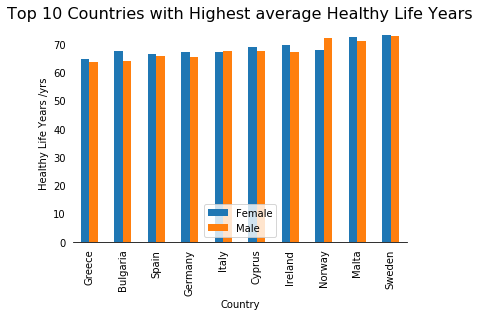

In [105]:
ax = data_2016[21:].plot(kind='bar')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Switch off ticks
ax.tick_params(axis='both', which='both', bottom=0, top=0, labelbottom=1, left=0, right=0, labelleft=1)

ax.set_xlabel('Country')
ax.set_ylabel('Healthy Life Years /yrs')
ax.set_title('Top 10 Countries with Highest average Healthy Life Years',size=16)

ax.get_figure().savefig('./plots/hly_bar_chart.png',bbox_inches='tight')